Classification Task

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/hw/obesity_data.csv')

In [ ]:
# Display basic information
print("Dataset Overview:\n", df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())
print("\nColumn Names:\n", df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB
Dataset Overview:
 None

Summary Statistics:
                Age       Height       Weight          BMI  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     49.857000   170.052417    71.205769    24.888317   
std      18.114267    10.309971    15.509849     6.193912   
min      18.000000   136.115719    26.065730     8.470572   
25%      35.0

In [ ]:
# Choosing an appropriate target column
target_column = 'ObesityCategory'

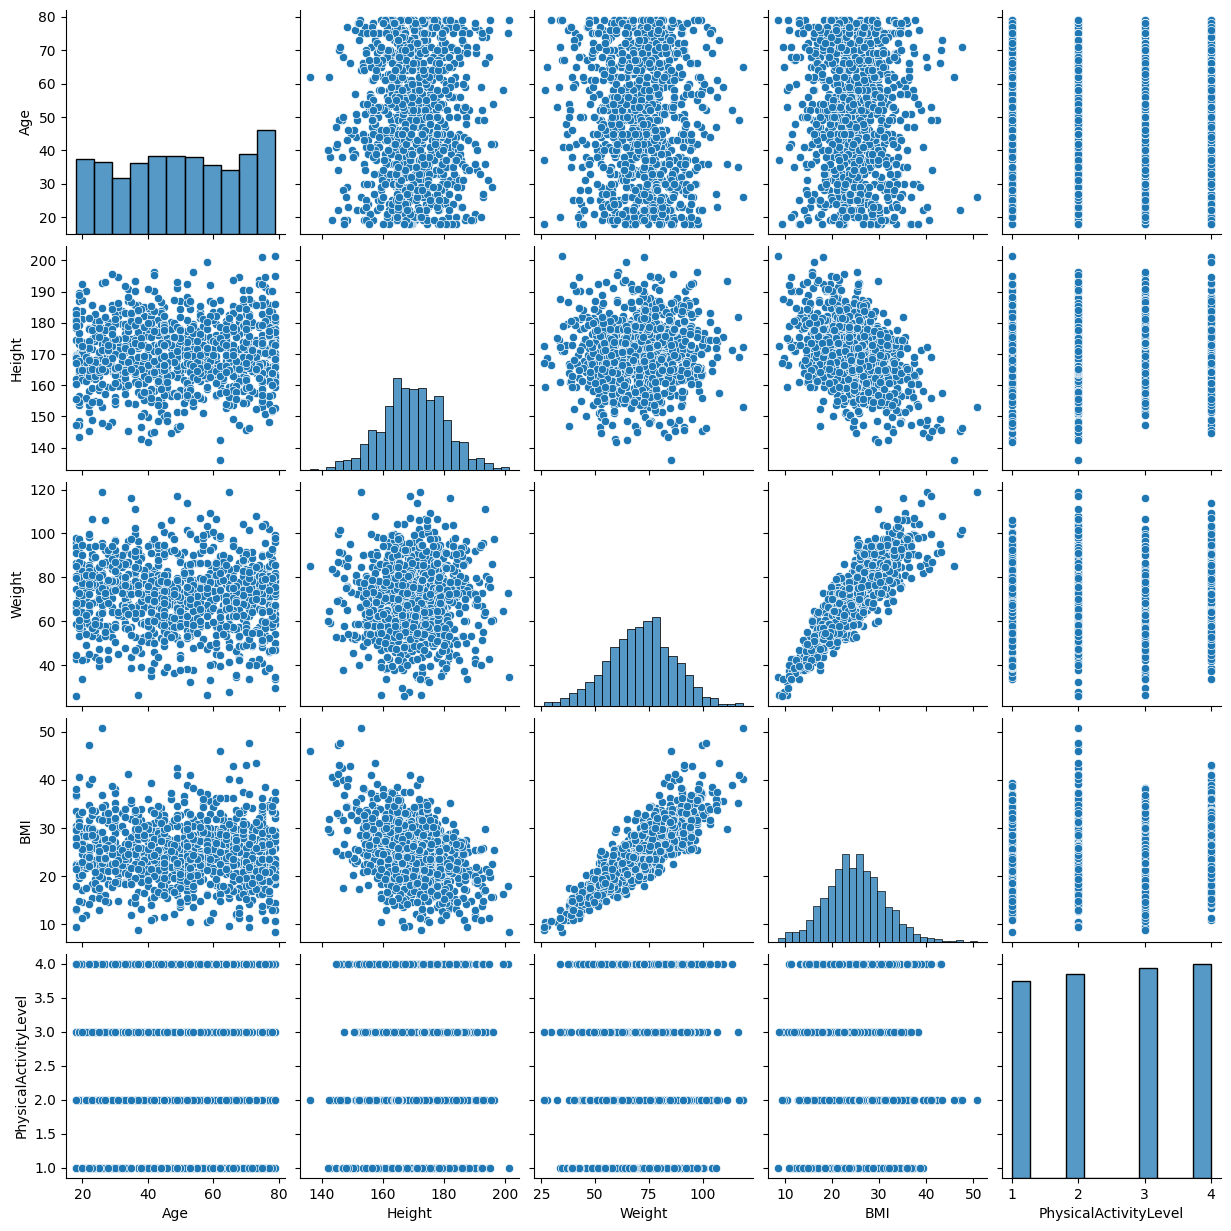

In [ ]:
# Pairplot to explore relationships (Only for small datasets)
sns.pairplot(df)
plt.show()

<ipython-input-83-a678cb008c6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[target_column], palette="viridis")


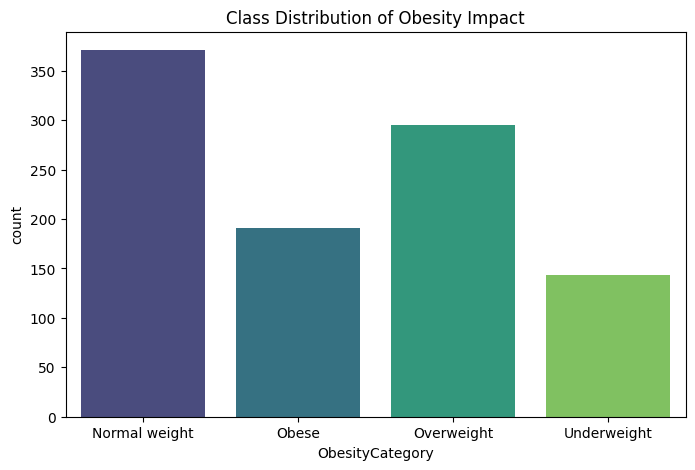

In [ ]:
# Class Distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df[target_column], palette="viridis")
plt.title("Class Distribution of Obesity Impact")
plt.show()

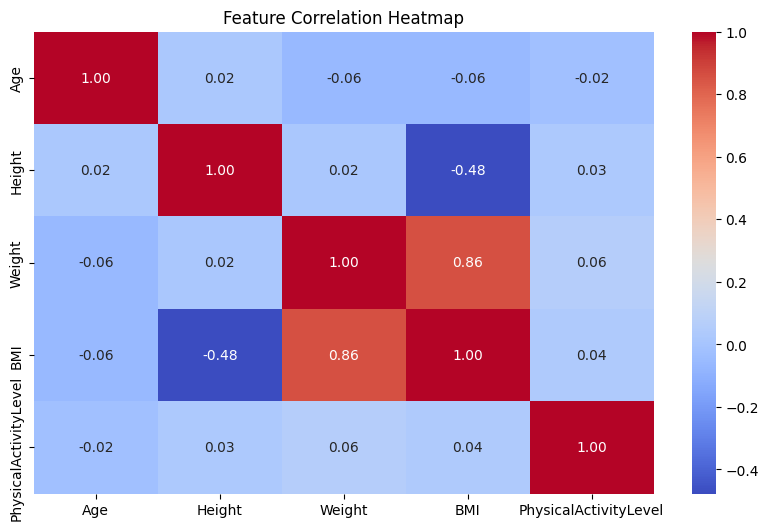

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
# Include only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

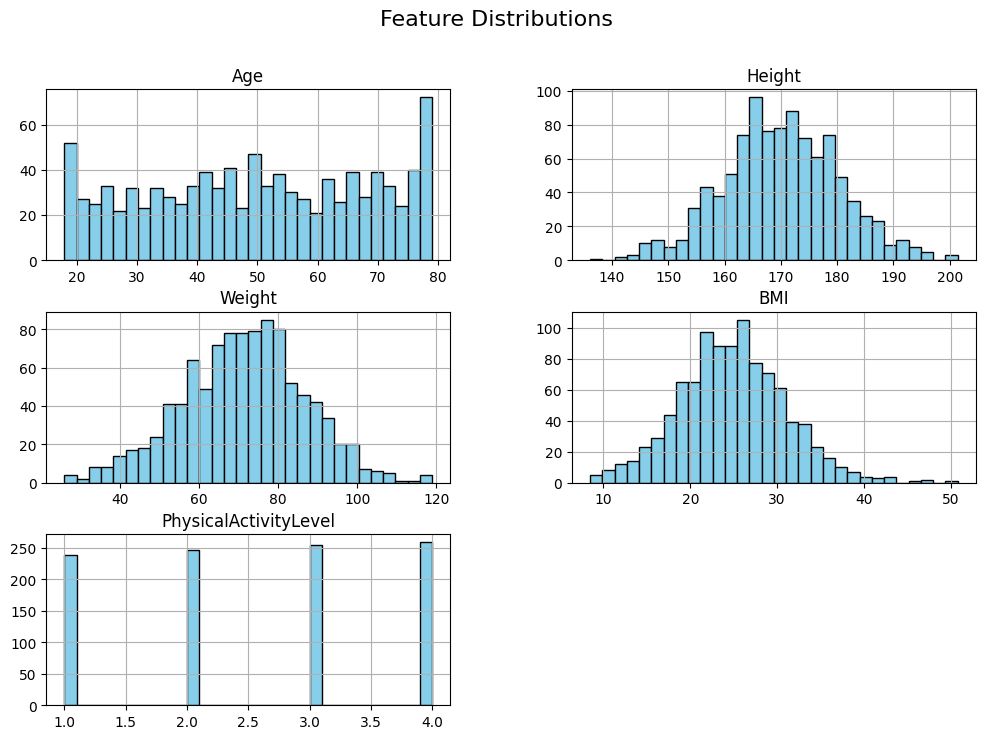

In [ ]:
# Feature Distributions
df.hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

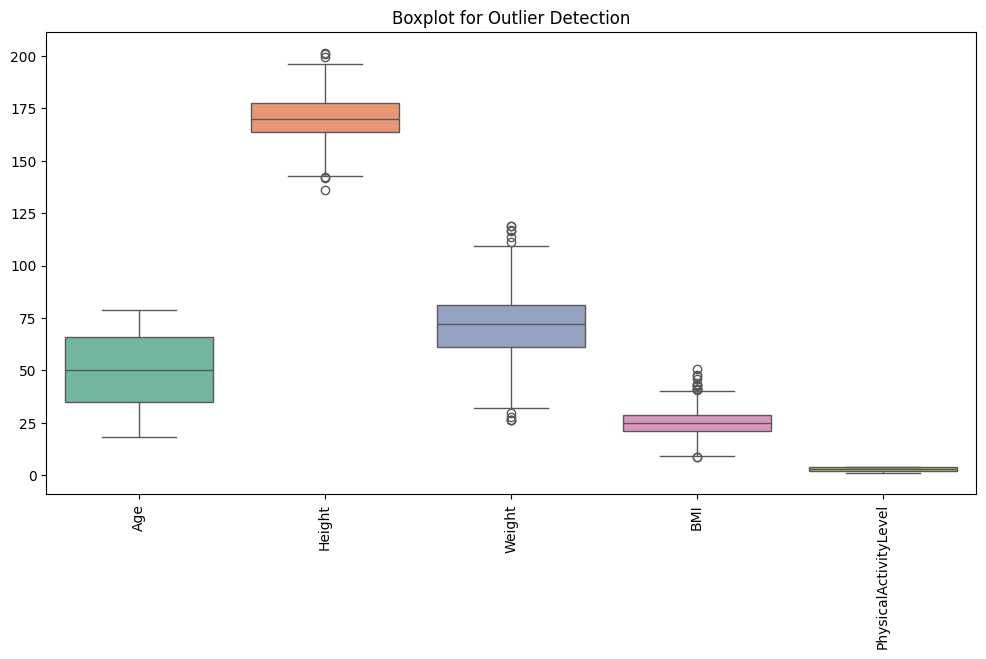

In [ ]:
# Boxplots for Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df, palette="Set2")
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [ ]:
# Data Preprocessing
# Handle missing values
# Splitting dataset into features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

In [ ]:
# Convert categorical columns to numeric if necessary
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Splitting dataset into features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build Logistic Regression from Scratch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    return (-1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        theta -= (alpha/m) * (X.T @ (sigmoid(X @ theta) - y))
    return theta

X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta = np.zeros(X_train_bias.shape[1])
optimized_theta = gradient_descent(X_train_bias, y_train, theta, alpha=0.01, iterations=1000)

In [ ]:
# Predict using custom Logistic Regression
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)
y_pred_custom = predict(np.c_[np.ones((X_test.shape[0], 1)), X_test], optimized_theta)
print("Custom Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))

Custom Logistic Regression Performance:
Accuracy: 0.15
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.15      0.94      0.26        32
           2       0.00      0.00      0.00        65
           3       0.00      0.00      0.00        31

    accuracy                           0.15       200
   macro avg       0.04      0.23      0.07       200
weighted avg       0.02      0.15      0.04       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Train ML Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.965
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       1.00      0.94      0.97        32
           2       0.94      0.97      0.95        65
           3       1.00      0.97      0.98        31

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.97       200
weighted avg       0.97      0.96      0.97       200

Confusion Matrix:
 [[70  0  2  0]
 [ 0 30  2  0]
 [ 2  0 63  0]
 [ 1  0  0 30]]

Decision Tree Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        31

    accuracy                           1.00       200
   macro avg       

In [ ]:
# Hyperparameter Optimization using GridSearchCV
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]}
}

best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"\nBest parameters for {name}: {grid_search.best_params_}")


Best parameters for Logistic Regression: {'C': 10}

Best parameters for Decision Tree: {'max_depth': 3}

Best parameters for Random Forest: {'n_estimators': 50}


In [ ]:
# Feature Selection using Recursive Feature Elimination (RFE)
rfe = RFE(LogisticRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]
print("\nSelected Features:", selected_features)


Selected Features: Index(['Age', 'Gender', 'Height', 'Weight', 'BMI'], dtype='object')


In [ ]:
# Final Model Evaluation
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\nFinal {name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Final Logistic Regression Model Performance:
Accuracy: 0.97
Precision: 0.9705970149253731
Recall: 0.97
F1-Score: 0.970065982404692
Confusion Matrix:
 [[70  0  2  0]
 [ 0 30  2  0]
 [ 2  0 63  0]
 [ 0  0  0 31]]

Final Decision Tree Model Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[72  0  0  0]
 [ 0 32  0  0]
 [ 0  0 65  0]
 [ 0  0  0 31]]

Final Random Forest Model Performance:
Accuracy: 0.995
Precision: 0.9950757575757575
Recall: 0.995
F1-Score: 0.994979401429783
Confusion Matrix:
 [[72  0  0  0]
 [ 0 31  1  0]
 [ 0  0 65  0]
 [ 0  0  0 31]]


In [ ]:
# Conclusion
print("\nConclusion: The best performing model based on accuracy and F1-score is:",
  max(best_models, key=lambda name: accuracy_score(y_test, best_models[name].predict(X_test))))


Conclusion: The best performing model based on accuracy and F1-score is: Decision Tree
